In [2]:
import diffusers
from diffusers import UNet2DConditionModel
from PIL import Image
import sys
from transformers import CLIPVisionModel, CLIPImageProcessor
import torch

sys.path.append("/home/aihao/workspace/StableDiffusionReferenceOnly/src")
from stable_diffusion_reference_only.pipelines.stable_diffusion_reference_only_without_blueprint_pipeline import (
    StableDiffusionReferenceOnlyWithoutBlueprintipeline,
)
from diffusers.schedulers import DDPMScheduler, UniPCMultistepScheduler
import json

In [ ]:
pretrained_unet_path = "stabilityai/stable-diffusion-2-1"
pretrained_image_encoder_path = "openai/clip-vit-large-patch14"

# unet_config_path = "/home/aihao/workspace/StableDiffusionReferenceOnly/src/stable_diffusion_reference_only/models/unet_xl-base-1.0.json"
# pretrained_unet_path = "stabilityai/stable-diffusion-xl-base-1.0"
# pretrained_image_encoder_path = "laion/CLIP-ViT-bigG-14-laion2B-39B-b160k"

In [ ]:
unet = UNet2DConditionModel.from_pretrained(pretrained_unet_path, subfolder="unet")

In [ ]:
# vae = diffusers.AutoencoderKL.from_pretrained("stabilityai/sdxl-vae")
vae = diffusers.AutoencoderKL.from_pretrained(
    "stabilityai/stable-diffusion-2-1", subfolder="vae"
)

In [ ]:
image_encoder = CLIPVisionModel.from_pretrained(pretrained_image_encoder_path)

In [ ]:
clip_image_processor = CLIPImageProcessor.from_pretrained(pretrained_image_encoder_path)

In [ ]:
scheduler = DDPMScheduler.from_pretrained(pretrained_unet_path, subfolder="scheduler")

In [ ]:
pipe = StableDiffusionReferenceOnlyWithoutControlPipeline(
    vae,
    image_encoder,
    clip_image_processor,
    unet,
    scheduler,
)

In [ ]:
pipe.save_pretrained(
    "../../DeepLearningContent/models/sd_reference_only_without_blueprint/sd-2-1-init"
)

In [7]:
pipeline = StableDiffusionReferenceOnlyWithoutBlueprintipeline.from_pretrained(
    "../../DeepLearningContent/models/sd_reference_only_without_blueprint/sd-2-1-init"
).to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
pipeline.scheduler = UniPCMultistepScheduler.from_config(pipeline.scheduler.config)
pipeline.enable_xformers_memory_efficient_attention()

In [10]:
image = pipeline(
    prompt=Image.open(
        "/home/aihao/workspace/StableDiffusionReferenceOnly/validation_images/1/1.png"
    )
    .convert("RGB")
    .resize((512, 512)),
    num_inference_steps=20,
    height=512,
    width=512,
).images[0]

/home/aihao/miniconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/20 [00:00<?, ?it/s]

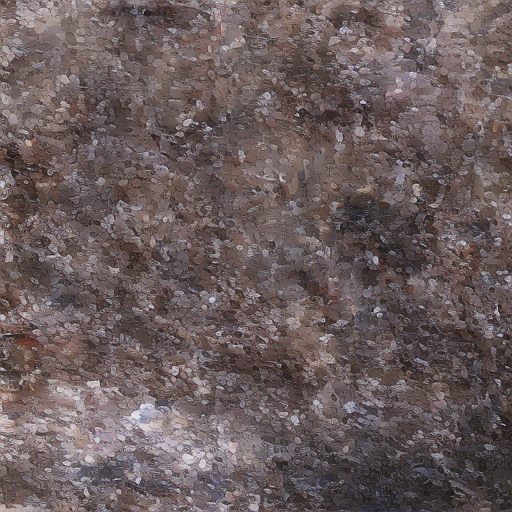

In [11]:
image